In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
import xgboost as xgb


Load the Data

In [14]:
df=pd.read_csv('data/stud.csv')

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
x = df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [17]:
numeric_features = x.select_dtypes(exclude=['object']).columns
categorical_features = x.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
[
    ("onehotencoder", oh_transformer, categorical_features),
    ("scaler", numeric_transformer, numeric_features),
]

)




In [18]:
x = preprocessor.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": xgb.XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"{list(models.keys())[i]}:")
    model_list.append(list(models.keys())[i])

    print("Model performance on Training set:")
    print(f"MAE:{model_train_mae:.4f}")
    print(f"MSE: {model_train_mse:.4f}")
    print(f"RMSE: {model_train_rmse:.4f}")
    print(f"R2: {model_train_r2:.4f}")

    print("\nModel performance on Test set:")
    print(f"MAE: {model_test_mae}")
    print(f"MSE: {model_test_mse:.4f}")
    print(f"RMSE: {model_test_rmse:.4f}")
    print(f"R2: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)

    print("-"*50)
    print("\n")

Linear Regression:
Model performance on Training set:
MAE:4.2667
MSE: 28.3349
RMSE: 5.3231
R2: 0.8743

Model performance on Test set:
MAE: 4.214763142474852
MSE: 29.0952
RMSE: 5.3940
R2: 0.8804
--------------------------------------------------


Ridge Regression:
Model performance on Training set:
MAE:4.2650
MSE: 28.3378
RMSE: 5.3233
R2: 0.8743

Model performance on Test set:
MAE: 4.211100688014259
MSE: 29.0563
RMSE: 5.3904
R2: 0.8806
--------------------------------------------------


Lasso Regression:
Model performance on Training set:
MAE:5.2063
MSE: 43.4784
RMSE: 6.5938
R2: 0.8071

Model performance on Test set:
MAE: 5.157881810347763
MSE: 42.5064
RMSE: 6.5197
R2: 0.8253
--------------------------------------------------


K-Nearest Neighbors:
Model performance on Training set:
MAE:4.5270
MSE: 32.6859
RMSE: 5.7172
R2: 0.8550

Model performance on Test set:
MAE: 5.627999999999999
MSE: 52.6388
RMSE: 7.2553
R2: 0.7837
--------------------------------------------------


Decision Tre

RESULTS

In [35]:
pd.DataFrame({"Model": model_list, "R2_Score": r2_list}).sort_values(by="R2_Score", ascending=False)

,Model,R2_Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.852241
8,CatBoost,0.851632
7,XGBoost,0.827797
2,Lasso Regression,0.825320
3,K-Nearest Neighbors,0.783681
4,Decision Tree,0.752793
6,Support Vector Regressor,0.728600


Linear Regression

In [36]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print(f"R2 Score:{score:.4f}")

R2 Score:88.0433


Plot y_pred and y_test

Text(0, 0.5, 'Predicted Values')

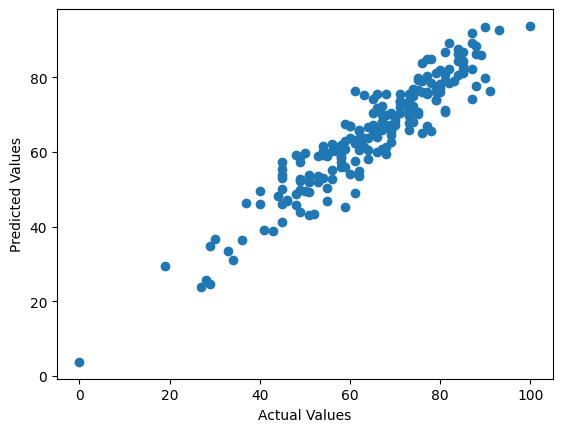

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")              

<Axes: xlabel='math_score'>

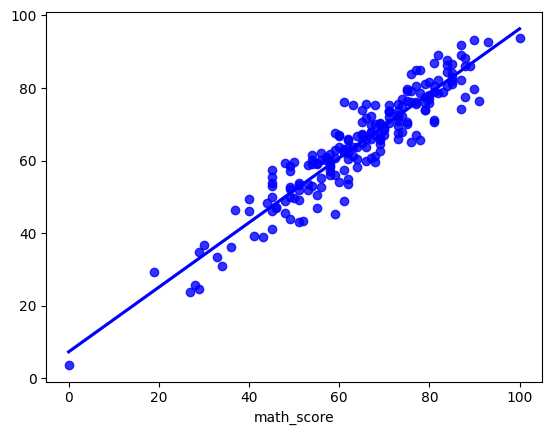

In [38]:
sns.regplot(x=y_test, y=y_pred, ci=None,color='blue')


In [39]:
pred_df = pd.DataFrame({"Actual Values": y_test, "Predicted Values": y_pred})
pred_df.head()

,Actual Values,Predicted Values
521,91,76.387970
737,53,58.885970
740,80,76.990265
660,74,76.851804
411,84,87.627378
